In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
print(pd.__version__)
print(sklearn.__version__)
print(statsmodels.__version__)

1.4.2
1.0.2
0.13.2


In [22]:
filename = os.listdir('data')[0]
ts = pd.read_csv('data/'+filename,index_col=0, parse_dates=True)
ts

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-28,83200.0,83200.0,82100.0,82100.0,80985.664063,15596759
2021-04-29,82400.0,82500.0,81500.0,81700.0,80591.093750,20000973
2021-04-30,81900.0,82100.0,81500.0,81500.0,80393.812500,18673197
2021-05-03,81000.0,82400.0,81000.0,81700.0,80591.093750,15710336
2021-05-04,81900.0,82600.0,81800.0,82600.0,81478.882813,12532550
...,...,...,...,...,...,...
2022-04-22,67200.0,67300.0,66700.0,67000.0,67000.000000,11791478
2022-04-25,66500.0,66700.0,66300.0,66300.0,66300.000000,11016474
2022-04-26,66400.0,66700.0,66100.0,66100.0,66100.000000,12946923


In [23]:
ts.index

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-06', '2021-05-07', '2021-05-10',
               '2021-05-11', '2021-05-12',
               ...
               '2022-04-15', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-25', '2022-04-26',
               '2022-04-27', '2022-04-28'],
              dtype='datetime64[ns]', name='Date', length=247, freq=None)

In [30]:
price = ts['Close']

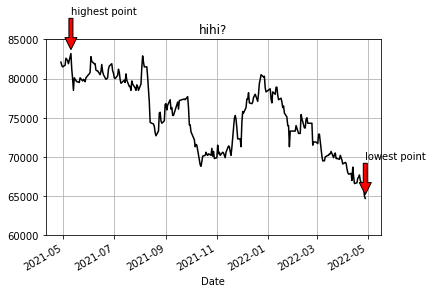

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black',)
plt.ylim([60000,85000])
# plt.xlim([])
plt.grid()
minmax = [(price.argmin(),'lowest point'),(price.argmax(),'highest point')]
for d, label in minmax:
    ax.annotate(label, xy=(price.index[d],price[d]+500), xytext=(price.index[d],price[d]+5000), arrowprops=dict(facecolor='red'))
ax.set_title('hihi?')
plt.show()

In [63]:
print(price.argmax(),price.argmin(),price[price.argmax()])

83200.0

246

In [59]:
from datetime import datetime
datetime(2022,4,30).timestamp()

1651244400.0

In [48]:
help(price.asof)

Help on method asof in module pandas.core.generic:

asof(where, subset=None) method of pandas.core.series.Series instance
    Return the last row(s) without any NaNs before `where`.
    
    The last row (for each element in `where`, if list) without any
    NaN is taken.
    In case of a :class:`~pandas.DataFrame`, the last row without NaN
    considering only the subset of columns (if not `None`)
    
    If there is no good value, NaN is returned for a Series or
    a Series of NaN values for a DataFrame
    
    Parameters
    ----------
    where : date or array-like of dates
        Date(s) before which the last row(s) are returned.
    subset : str or array-like of str, default `None`
        For DataFrame, if not `None`, only use these columns to
        check for NaNs.
    
    Returns
    -------
    scalar, Series, or DataFrame
    
        The return can be:
    
        * scalar : when `self` is a Series and `where` is a scalar
        * Series: when `self` is a Series and